In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")                 #importing necessary libraries

In [27]:
df=pd.read_csv("titanic survival.csv")            #fetching the data

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
df.info()                     #checking the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [30]:
df.isnull().sum()              #checking the null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [31]:
df['Age'].fillna(df['Age'].mean(), inplace=True)         #filling the null values of age with its mean value

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
df.isnull().sum()          

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [34]:
df['Fare'] = df['Fare'].fillna( df['Fare'].median())

In [35]:
df=df.drop(columns='Cabin', axis=1)               #dropping the cabin column because there is more than 50% null values

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [37]:
df=df.drop(columns='Name', axis=1)           #dropping the unnecessary column 'Name','Ticket' and 'PassengerId'

In [38]:
df=df.drop(columns='Ticket', axis=1)

In [39]:
df['Sex']=df['Sex'].map({'male': 0,'female':1})          #Encoding the categorical columns: 'Sex' and 'Embarked'

In [40]:
df['Embarked']=df['Embarked'].map({'C': 0,'Q':1, 'S': 2})


Exploratory Data Analysis

In [41]:
df['Survived'].value_counts()                  #checking the survived and not survived counts

Survived
0    266
1    152
Name: count, dtype: int64

In [42]:
df.describe()             

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,0.363636,30.272590,0.447368,0.392344,35.576535,1.401914
std,120.810458,0.481622,0.841838,0.481622,12.634534,0.896760,0.981429,55.850103,0.854496
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,1100.500000,0.000000,3.000000,0.000000,30.272590,0.000000,0.000000,14.454200,2.000000
75%,1204.750000,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,2.000000
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [43]:
df["Fare"].value_counts()

Fare
7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: count, Length: 169, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


Visualization

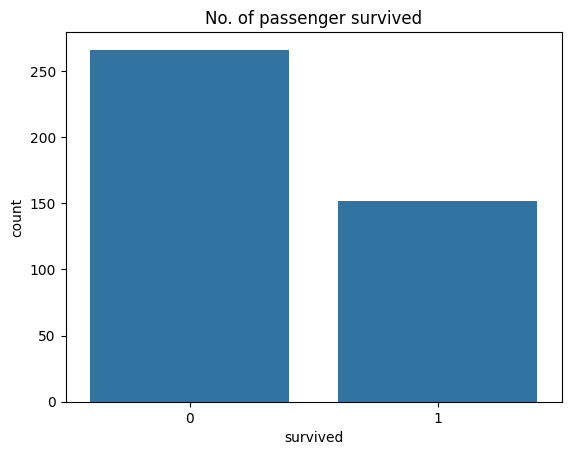

In [45]:
sns.countplot(x='Survived', data=df)
plt.xlabel("survived")
plt.ylabel("count")
plt.title("No. of passenger survived")                   #count plot visualization of No. of passenger survived and not survived
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

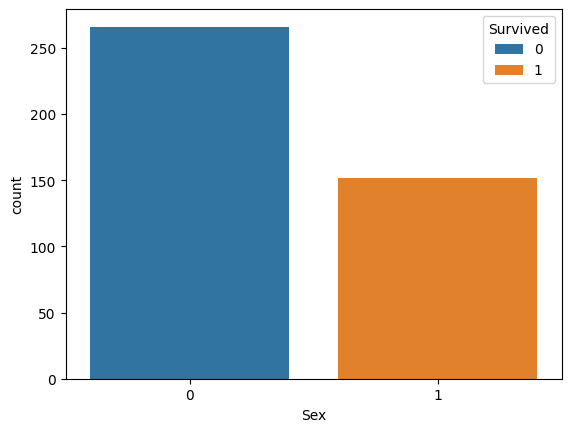

In [46]:
sns.countplot(x="Sex", hue="Survived", data=df)         #count plot of survived and not survived according to gender 

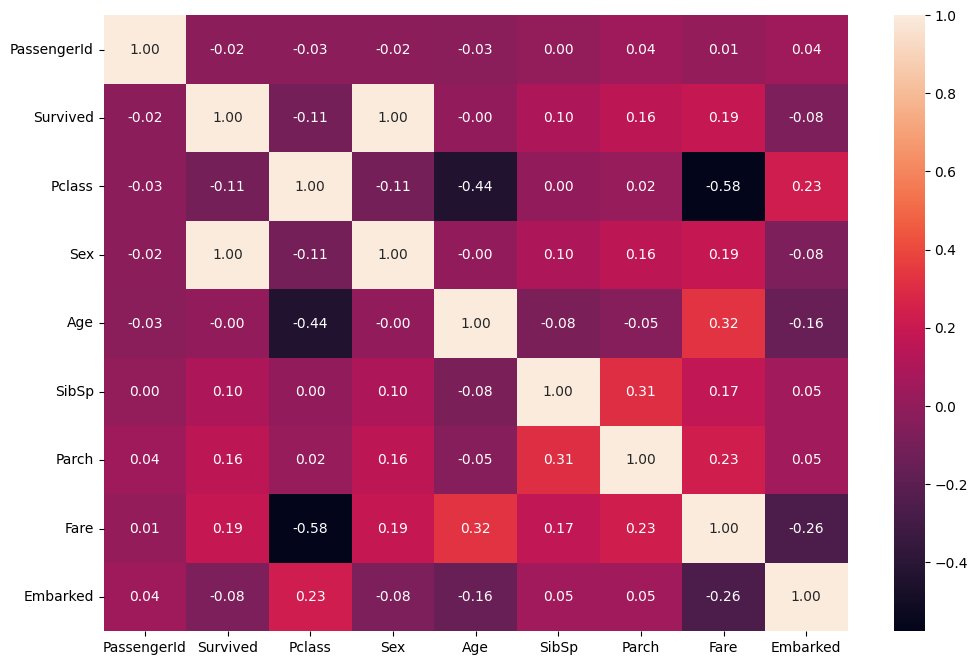

In [47]:
corr=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True,fmt=".2f")                  #visualizing the correlated columns
plt.show()

Train test split

In [24]:
from sklearn.model_selection import train_test_split     #importing train_test_split

In [48]:
X=df.drop(columns=['Survived','PassengerId'], axis=1)                       # assigning X for train_test_split

In [49]:
y=df["Survived"]                                   #assigning y for train_test_split

In [54]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,1
1,3,1,47.00000,1,0,7.0000,2
2,2,0,62.00000,0,0,9.6875,1
3,3,0,27.00000,0,0,8.6625,2
4,3,1,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,2
414,1,1,39.00000,0,0,108.9000,0
415,3,0,38.50000,0,0,7.2500,2
416,3,0,30.27259,0,0,8.0500,2


In [55]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [56]:
X_tr,X_te,y_tr,y_te=train_test_split(X,y, test_size=0.2, random_state=42)           #performing train_test_split

In [57]:
X_tr.shape         #Shape of X training data

(334, 7)

In [58]:
X_te.shape          #Shape of X testing data

(84, 7)

Model Building

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score                 #importing necessary libraries

In [60]:
model=LogisticRegression()                 

In [61]:
df.astype({'Age': 'int', 'Fare':'int'}).dtypes          #changing the data type from float to integer

PassengerId    int64
Survived       int64
Pclass         int64
Sex            int64
Age            int32
SibSp          int64
Parch          int64
Fare           int32
Embarked       int64
dtype: object

In [62]:
model.fit(X_tr, y_tr)                 #training the model with Logistic Regression

LogisticRegression()

In [71]:
X_pr=model.predict(X_tr)

In [75]:
train_accuracy=accuracy_score(y_tr,X_pr)

In [76]:
train_accuracy                  #training accuracy

1.0

In [77]:
y_pr=model.predict(X_te)

In [78]:
test_accuracy=accuracy_score(y_te,y_pr)

In [79]:
test_accuracy                 #testing accuracy

1.0

In [64]:
model.score(X_tr,y_tr)             #checking the model score

1.0